# Crypto & Bokeh

In [5]:
import requests
import pandas as pd

In [6]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [7]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week
btc = get_historic_price('btc', 'bitstamp', after=last_week)
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [8]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-05-05 07:00:00,9025.88,9067.09,8975.00,9034.93,310.565602,2.801392e+06
2020-05-05 08:00:00,9031.66,9086.97,9011.00,9021.76,322.036001,2.915160e+06
2020-05-05 09:00:00,9022.31,9050.00,8984.19,9040.56,404.794957,3.651974e+06
2020-05-05 10:00:00,9044.73,9083.00,8996.89,9005.93,609.524017,5.503523e+06
2020-05-05 11:00:00,9001.18,9007.42,8760.10,8861.68,1318.937239,1.169027e+07


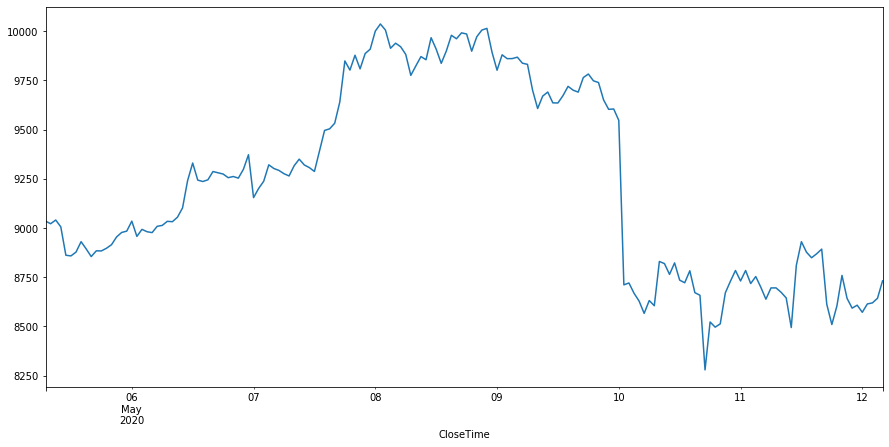

In [9]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [10]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-05-05 07:00:00,208.80,210.03,207.69,209.37,689.006798,1.438241e+05
2020-05-05 08:00:00,209.40,210.42,208.50,208.67,1663.060713,3.486185e+05
2020-05-05 09:00:00,208.74,209.82,207.96,209.56,779.901926,1.631419e+05
2020-05-05 10:00:00,209.32,210.02,206.47,206.76,1149.104432,2.396454e+05
2020-05-05 11:00:00,206.42,206.42,200.66,203.44,6844.147349,1.392878e+06


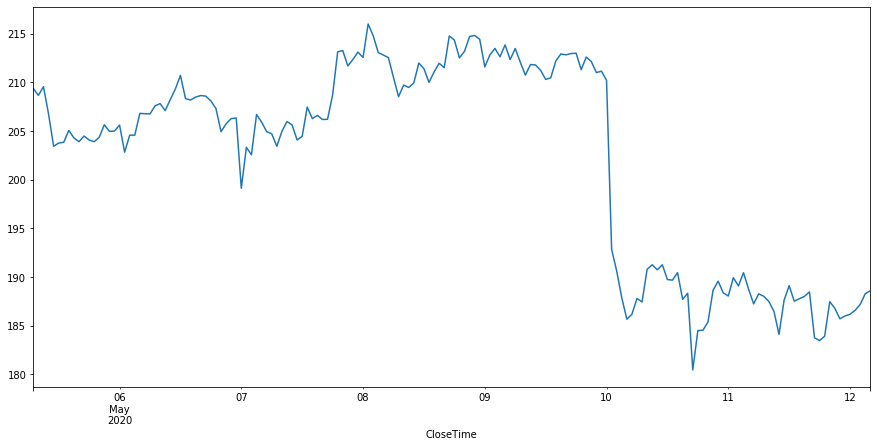

In [11]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [12]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-05-05 07:00:00,208.80,210.03,207.69,209.37,689.006798,1.438241e+05
2020-05-05 08:00:00,209.40,210.42,208.50,208.67,1663.060713,3.486185e+05
2020-05-05 09:00:00,208.74,209.82,207.96,209.56,779.901926,1.631419e+05
2020-05-05 10:00:00,209.32,210.02,206.47,206.76,1149.104432,2.396454e+05
2020-05-05 11:00:00,206.42,206.42,200.66,203.44,6844.147349,1.392878e+06


In [13]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [14]:
output_notebook()

Loading BokehJS ...

In [20]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [21]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [22]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [23]:
eth.to_excel(writer, sheet_name='Ether')

In [24]:
writer.save()